# kaggle Titanic competition

In [1478]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.model_selection import  GridSearchCV, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

Load the training and testing data and get the index of the test data.

In [1479]:
train_data = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")
index = test_data.PassengerId
index.head()

0    892
1    893
2    894
3    895
4    896
Name: PassengerId, dtype: int64

### Get insights into the training & testing data
Use `train_data.head()` for a tabular overview of the training data.

In [1480]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Use `train_data.info()` to get further insight into the training data.

In [1481]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [1482]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


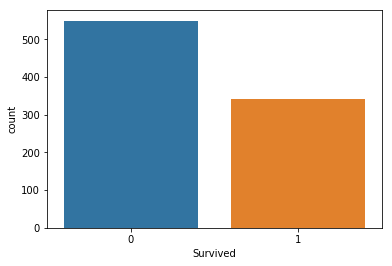

In [1483]:
sns.countplot(train_data.Survived)
plt.show()

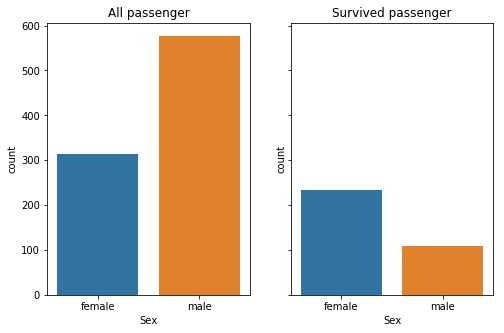

In [1484]:
fig, ax =plt.subplots(1,2 , figsize=(8, 5) , sharex='col', sharey='row')
a = sns.countplot(x = 'Sex' , data=train_data , ax = ax[0] , order=['female' , 'male'])
b = sns.countplot(x = 'Sex' , data= train_data[train_data.Survived == 1] , 
                  order=['female' , 'male'])
ax[0].set_title('All passenger')
ax[1].set_title('Survived passenger')
plt.show()

In [1485]:
print('Survived women: {:.2} %'.format(sum((train_data.Sex == 'female') & (train_data.Survived == 1)) / 
                                sum(train_data.Sex == 'female')))

Survived women: 0.74 %


In [1486]:
print('Survived men: {:.2} %'.format(sum((train_data.Sex == 'male') & (train_data.Survived == 1)) / 
                                sum(train_data.Sex == 'male')))

Survived men: 0.19 %


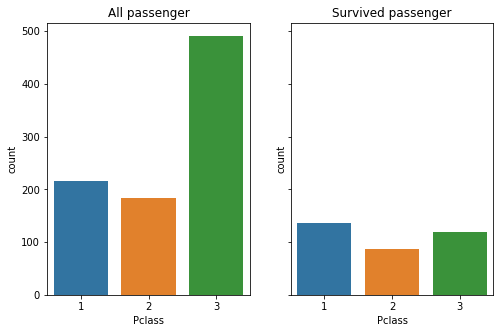

In [1487]:
fig, ax =plt.subplots(1,2 , figsize=(8, 5) , sharex='col', sharey='row')
a = sns.countplot(x = 'Pclass' , data=train_data , ax = ax[0] , order=[1, 2, 3])
b = sns.countplot(x = 'Pclass' , data= train_data[train_data.Survived == 1] , 
                  order=[1, 2, 3])
ax[0].set_title('All passenger')
ax[1].set_title('Survived passenger')
plt.show()

In [1488]:
for i in range(1, 4):
    print('Survival rate of women of the {}. class: {:.2} %'.format(i, sum((train_data.Sex == 'female') 
                                                                           & (train_data.Survived == 1) 
                                                                           & (train_data.Pclass == i)) 
                                                                    / sum((train_data.Sex == 'female') 
                                                                          & (train_data.Pclass == i))))

Survival rate of women of the 1. class: 0.97 %
Survival rate of women of the 2. class: 0.92 %
Survival rate of women of the 3. class: 0.5 %


In [1489]:
for i in range(1,4):
    print('Survival rate of men of the {}. class: {:.2} %'.format(i, sum((train_data.Sex == 'male') 
                                                                         & (train_data.Survived == 1) 
                                                                         & (train_data.Pclass == i)) 
                                                                  / sum((train_data.Sex == 'male') 
                                                                        & (train_data.Pclass == i))))

Survival rate of men of the 1. class: 0.37 %
Survival rate of men of the 2. class: 0.16 %
Survival rate of men of the 3. class: 0.14 %


Display an overview of the missing values.

In [1490]:
def displayMissingValues(data):
    for attribute in data.columns.tolist():
        print('Missing values within {}: {}'.format(attribute, data[attribute].isnull().sum()))

In [1491]:
displayMissingValues(train_data)

Missing values within PassengerId: 0
Missing values within Survived: 0
Missing values within Pclass: 0
Missing values within Name: 0
Missing values within Sex: 0
Missing values within Age: 177
Missing values within SibSp: 0
Missing values within Parch: 0
Missing values within Ticket: 0
Missing values within Fare: 0
Missing values within Cabin: 687
Missing values within Embarked: 2


In [1492]:
displayMissingValues(test_data)

Missing values within PassengerId: 0
Missing values within Pclass: 0
Missing values within Name: 0
Missing values within Sex: 0
Missing values within Age: 86
Missing values within SibSp: 0
Missing values within Parch: 0
Missing values within Ticket: 0
Missing values within Fare: 1
Missing values within Cabin: 327
Missing values within Embarked: 0


`train_data.info()` and `displayMissingValues` reveal some missing data within the columns `Age`, `Cabin`and `Embarked` for the training data. For the testing data there is in addition one missing value at the `Fare` attribute.
<br><br>
In general there are four possibilities to **handle missing values**:
* delete the entries with the missing values
* delete the hole attribute with the missing values
* fill the missing values with the median value of that attribute
* try to get the missing values afterwards

Furthermore `train_data.info()` reveals that the attributes have three data types: 
* `int64` -> which is okay for further processing.
* `float64` -> which is okay for further processing.
* `object` -> these attributes have to be adopted for further processing.
<br>

First let's have a look at these object attributes and their importance for the upcoming machine-learning process:
* `Name` is an individual value and in the first attempt with no valuable information but the title may inherit some valuable information for machine learning and will be undergo further preprocessing.
* `Sex` is important for further processing. We will use one-hot-encoding to make this attribute processable.
* `Ticket` is an individual number with no valuable information and therefore not important for further processing.
* `Cabin` is a valuable information source but there are just 204 out of 981 values available. 
* `Embarked` can be interesting for further processing. We will use one-hot-encoding to make this attribute processable.

For correlation and description convert the categorical attribute `Sex` into a numerical attribute. Create a new dataset train_data_corr.
Use `train_data_corr.describe()` and `train_data_corr.corr()` to get an insight of the numerical attributes.

In [1493]:
train_data_corr = train_data.copy()
train_data_corr.Sex.replace({'male': 0, 'female':1}, inplace=True)

In [1494]:
train_data_corr.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


Check the correlation between the numerical values:

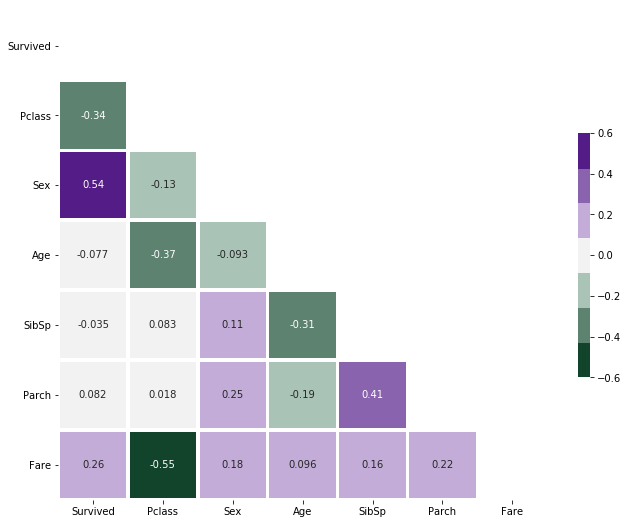

In [1495]:
# Delete 'PassengerId' 
train_data_corr.drop('PassengerId', axis=1, inplace=True)
corr_matriX = train_data_corr.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matriX)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(11, 9))

# Generate a colormap
cmap = sns.diverging_palette(145, 280, s=85, l=25, n=7)

# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(corr_matriX,  annot=True, mask=mask, cmap=cmap, 
            vmax =.6, vmin =-.6,  center=0, square=True, 
            linewidths=2.5, cbar_kws={"shrink": .5})

ax.set_yticklabels(ax.get_yticklabels(), rotation = 0)

plt.show()

### Prepare the training and testing data

##### Embarked - attribute
Lets have a closer look at the entries with the missing `Embarked` values.

In [1496]:
train_data.loc[train_data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Miss Amelie Icard and Mrs. George Nelson (Martha Evelyn) Stone had the same ticket number and lived in the same cabin. 
Searching for Mrs. George Nelson (Martha Evelyn) Stone on google led to the folowing link [encyclopedia-titanica.org](https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html). 
<br> 

Here you can find the following information:"Mrs Stone boarded the Titanic in **Southampton** on 10 April 1912 and was travelling in first class with her maid Amelie Icard. She occupied cabin B-28."
<br>

Now we know, that both women enbarked in Southampton which is abbreviated with an `S`. Lets fill this in:

In [1497]:
train_data.loc[train_data['Embarked'].isnull(), 'Embarked'] = 'S'

Check the insertion

In [1498]:
train_data.loc[train_data.PassengerId == 62]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S


In [1499]:
displayMissingValues(train_data)

Missing values within PassengerId: 0
Missing values within Survived: 0
Missing values within Pclass: 0
Missing values within Name: 0
Missing values within Sex: 0
Missing values within Age: 177
Missing values within SibSp: 0
Missing values within Parch: 0
Missing values within Ticket: 0
Missing values within Fare: 0
Missing values within Cabin: 687
Missing values within Embarked: 0


##### Fare - attribute (just testing data)
Lets have a closer look at the entry with the missing Value for the `Fare` attribute.

In [1500]:
test_data.loc[test_data.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


Calculate the median of the `Fare` attribute for the 3rd class and substitute it for the missing value. 

In [1501]:
test_data.loc[(test_data.Fare.isnull()), 'Fare'] = train_data.loc[(train_data.Pclass == 3)]['Fare'].median()

In [1502]:
test_data.loc[(test_data.PassengerId == 1044)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,8.05,NaN,S


##### PassengerId & Ticket - attribute
Remove the attributes `PassengerId` and `Ticket` from the training and the test set.

In [1503]:
train_data = train_data.drop(['PassengerId', 'Ticket'], axis=1)
test_data = test_data.drop(['PassengerId', 'Ticket'], axis=1)
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [1504]:
test_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,NaN,S


In [1505]:
displayMissingValues(train_data)

Missing values within Survived: 0
Missing values within Pclass: 0
Missing values within Name: 0
Missing values within Sex: 0
Missing values within Age: 177
Missing values within SibSp: 0
Missing values within Parch: 0
Missing values within Fare: 0
Missing values within Cabin: 687
Missing values within Embarked: 0


##### Age - attribute
###### Replace missing values (by hand)

There is also the possibility to replace the missing values with the sklearn.impute.SimpleImputer class.
Use [`sklearn.impute.SimpleImputer`](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) class for replacing missing values.
<br>
We replace the missing values here by hand because we want to distinguish between the classes and within the classes between the gender. 

In [1506]:
sample_age_incomplete_rows_train = train_data[train_data['Age'].isnull()].head(10)
sample_age_incomplete_rows_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
5,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,NaN,Q
17,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,13.0000,NaN,S
19,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,7.2250,NaN,C
26,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,7.2250,NaN,C
28,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,7.8792,NaN,Q
29,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,7.8958,NaN,S
31,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,146.5208,B78,C
32,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,7.7500,NaN,Q
36,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,7.2292,NaN,C
42,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,7.8958,NaN,C


In [1507]:
sample_age_incomplete_rows_test = test_data[test_data['Age'].isnull()].head(10)
sample_age_incomplete_rows_test

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
10,3,"Ilieff, Mr. Ylio",male,NaN,0,0,7.8958,NaN,S
22,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,31.6833,NaN,S
29,3,"Samaan, Mr. Elias",male,NaN,2,0,21.6792,NaN,C
33,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,23.4500,NaN,S
36,3,"Roth, Miss. Sarah A",female,NaN,0,0,8.0500,NaN,S
39,3,"Hee, Mr. Ling",male,NaN,0,0,56.4958,NaN,S
41,1,"Franklin, Mr. Thomas Parham",male,NaN,0,0,26.5500,D34,S
47,3,"Shaughnessy, Mr. Patrick",male,NaN,0,0,7.7500,NaN,Q
54,2,"Mangiavacchi, Mr. Serafino Emilio",male,NaN,0,0,15.5792,NaN,C
58,3,"Davison, Mr. Thomas Henry",male,NaN,1,0,16.1000,NaN,S


Calculate the median values depending on the class and the gender.

In [1508]:
medianAges = np.zeros((2,3))

for i in range(0, 2):
    for j in range(0, 3):
        if(i == 0):
            medianAges[i, j] = train_data.loc[(train_data.Pclass == j+1) 
                                              & (train_data.Sex == 'female')]['Age'].median()
        else:
            medianAges[i, j] = train_data.loc[(train_data.Pclass == j+1) 
                                              & (train_data.Sex == 'male')]['Age'].median()

medianAges

array([[35. , 28. , 21.5],
       [40. , 30. , 25. ]])

In [1509]:
def addMissingAgeValues(dataset, medianAges):
    for i in range(medianAges.shape[0]):
        for j in range(medianAges.shape[1]):
            if(i == 0):
                dataset.loc[(dataset.Pclass == j+1) & (dataset.Age.isnull()) 
                            & (dataset.Sex == 'female'), 'Age'] = medianAges[i, j]
            else:
                dataset.loc[(dataset.Pclass == j+1) & (dataset.Age.isnull()) 
                            & (dataset.Sex == 'male'), 'Age'] = medianAges[i, j]

Add the missing `Age` values to train_data and test_data.

In [1510]:
addMissingAgeValues(train_data, medianAges)
addMissingAgeValues(test_data, medianAges)

Check if the replacement was successful.

In [1511]:
train_data.loc[sample_age_incomplete_rows_train.index.values]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
5,0,3,"Moran, Mr. James",male,25.0,0,0,8.4583,NaN,Q
17,1,2,"Williams, Mr. Charles Eugene",male,30.0,0,0,13.0000,NaN,S
19,1,3,"Masselmani, Mrs. Fatima",female,21.5,0,0,7.2250,NaN,C
26,0,3,"Emir, Mr. Farred Chehab",male,25.0,0,0,7.2250,NaN,C
28,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,21.5,0,0,7.8792,NaN,Q
29,0,3,"Todoroff, Mr. Lalio",male,25.0,0,0,7.8958,NaN,S
31,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,35.0,1,0,146.5208,B78,C
32,1,3,"Glynn, Miss. Mary Agatha",female,21.5,0,0,7.7500,NaN,Q
36,1,3,"Mamee, Mr. Hanna",male,25.0,0,0,7.2292,NaN,C
42,0,3,"Kraeff, Mr. Theodor",male,25.0,0,0,7.8958,NaN,C


In [1512]:
test_data.loc[sample_age_incomplete_rows_test.index.values]

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
10,3,"Ilieff, Mr. Ylio",male,25.0,0,0,7.8958,NaN,S
22,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,35.0,0,0,31.6833,NaN,S
29,3,"Samaan, Mr. Elias",male,25.0,2,0,21.6792,NaN,C
33,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,21.5,1,2,23.4500,NaN,S
36,3,"Roth, Miss. Sarah A",female,21.5,0,0,8.0500,NaN,S
39,3,"Hee, Mr. Ling",male,25.0,0,0,56.4958,NaN,S
41,1,"Franklin, Mr. Thomas Parham",male,40.0,0,0,26.5500,D34,S
47,3,"Shaughnessy, Mr. Patrick",male,25.0,0,0,7.7500,NaN,Q
54,2,"Mangiavacchi, Mr. Serafino Emilio",male,30.0,0,0,15.5792,NaN,C
58,3,"Davison, Mr. Thomas Henry",male,25.0,1,0,16.1000,NaN,S


##### Cabin - attribute
Replace the cabin attribute by the more general deck attribute which encapsulates lots of cabins. There where 9 decks on the Titanic named A to G. A was the uppermost one and G was the lowermost one. The deck assignment is taken from the fist letter of the cabin. If the cabin has no value than we substitute it by MISSING.

In [1513]:
train_data['Deck'] = train_data.Cabin.str.get(0)
train_data['Deck'] = train_data['Deck'].fillna('MIS_DECK')
test_data['Deck'] = test_data.Cabin.str.get(0)
test_data['Deck'] = test_data['Deck'].fillna('MIS_DECK')

Check the assigned values for train_data.

In [1514]:
a = train_data['Deck'].unique()
np.sort(a)

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'MIS_DECK', 'T'], dtype=object)

Check the assigned values for test_data.

In [1515]:
b = test_data['Deck'].unique()
np.sort(b)

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'MIS_DECK'], dtype=object)

In [1516]:
train_data['Deck'].value_counts()

MIS_DECK    687
C            59
B            47
D            33
E            32
A            15
F            13
G             4
T             1
Name: Deck, dtype: int64

In [1517]:
test_data['Deck'].value_counts()

MIS_DECK    327
C            35
B            18
D            13
E             9
F             8
A             7
G             1
Name: Deck, dtype: int64

There is a T Deck within the training set which is not a correct Deck! Check where this comes from.

In [1518]:
train_data[train_data.Deck == 'T']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Deck
339,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,35.5,T,S,T


A Search on google led to the following result again from [encyclopedia-titanica.org](https://www.encyclopedia-titanica.org/titanic-victim/stephen-weart-blackwell.html): Blackwell occupied cabin "T" on the **Boat Deck** (ticket number 113784 which cost £35, 10s). And from [wikipedia](https://en.wikipedia.org/wiki/RMS_Titanic) you get the following information: "The Boat Deck, on which the lifeboats were housed..." Thus we know, that cabin T is located closest to deck A and therefore we replace T by A.  

In [1519]:
train_data.Deck.replace('T', 'A', inplace=True)
train_data['Deck'].value_counts()

MIS_DECK    687
C            59
B            47
D            33
E            32
A            16
F            13
G             4
Name: Deck, dtype: int64

Add -Deck to each deck description for better column naming after one-hot encoded this attribute.

In [1520]:
train_data.Deck.replace(['A','B','C','D','E','F','G'], 
                        ['A-Deck','B-Deck','C-Deck','D-Deck','E-Deck','F-Deck','G-Deck'], inplace=True)

In [1521]:
test_data.Deck.replace(['A','B','C','D','E','F','G'], 
                        ['A-Deck','B-Deck','C-Deck','D-Deck','E-Deck','F-Deck','G-Deck'], inplace=True)

Finally delete the `Cabin` attribute.

In [1522]:
train_data = train_data.drop('Cabin', axis=1)
test_data = test_data.drop('Cabin', axis=1)

##### Name - attribute
Extract the titles of the status out of the name attribute and create a new attribute `Title`.

In [1523]:
train_data['Status'] = train_data['Name'].str.split(',').str.get(1).str.split('.').str.get(0).str.strip()
test_data['Status'] = test_data['Name'].str.split(',').str.get(1).str.split('.').str.get(0).str.strip()
train_data.Status.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [1524]:
test_data.Status.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [1525]:
train_data['Status'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
the Countess      1
Lady              1
Don               1
Ms                1
Mme               1
Jonkheer          1
Capt              1
Sir               1
Name: Status, dtype: int64

In [1526]:
test_data.Status.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Dr          1
Ms          1
Name: Status, dtype: int64

Title substitution (to reduce the amounts of attributes):
* The titles `Miss`, `Mrs`, `Mr` and `Master` will stay as they are.
* The titles `Dr`, `Rev`, `Major`, `Ms`, `Mme`(Madam) and `Mlle`(Mademoiselle), `Col`, `Jonkheer`, `Sir`, `Lady`, `Don`, `the Countess` and `Capt` will be substituted by `ImpPers`.

In [1527]:
train_data.Status.replace(['Dr', 'Rev', 'Ms', 'Mme', 'Mlle', 'Major', 'Col', 'Jonkheer', 'Sir', 
                          'Lady', 'Don', 'the Countess', 'Capt'], 'ImpPers', inplace=True)
train_data['Status'].value_counts()

Mr         517
Miss       182
Mrs        125
Master      40
ImpPers     27
Name: Status, dtype: int64

In [1528]:
test_data.Status.replace(['Dr', 'Rev', 'Col', 'Dona', 'Ms'], 'ImpPers', inplace=True)
test_data['Status'].value_counts()

Mr         240
Miss        78
Mrs         72
Master      21
ImpPers      7
Name: Status, dtype: int64

Finally delete the `Name` attribute.

In [1529]:
train_data = train_data.drop('Name', axis=1)
test_data = test_data.drop('Name', axis=1)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Status
0,0,3,male,22.0,1,0,7.2500,S,MIS_DECK,Mr
1,1,1,female,38.0,1,0,71.2833,C,C-Deck,Mrs
2,1,3,female,26.0,0,0,7.9250,S,MIS_DECK,Miss
3,1,1,female,35.0,1,0,53.1000,S,C-Deck,Mrs
4,0,3,male,35.0,0,0,8.0500,S,MIS_DECK,Mr


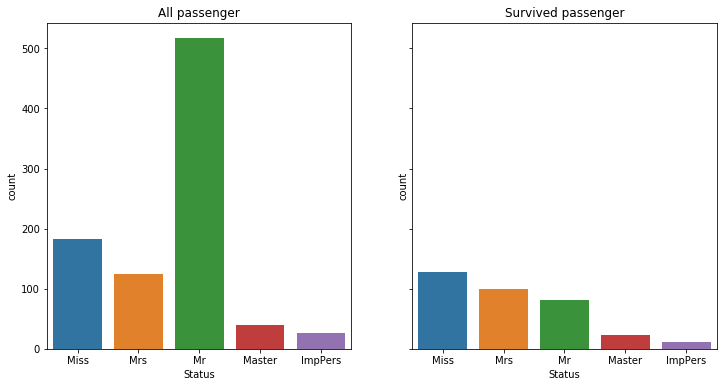

In [1530]:
fig, ax =plt.subplots(1,2 , figsize=(12, 6) , sharex='col', sharey='row')
a = sns.countplot(x = 'Status' , data=train_data , ax = ax[0] , 
                  order=['Miss' , 'Mrs', 'Mr', 'Master', 'ImpPers'])
b = sns.countplot(x = 'Status' , data= train_data[train_data.Survived == 1] , 
                  order=['Miss' , 'Mrs', 'Mr', 'Master', 'ImpPers'])
ax[0].set_title('All passenger')
ax[1].set_title('Survived passenger')
plt.show()

##### SibSp & Parch - attribute
A combination of the two attributes `SibSp` (siblings / spouses) and `Parch` (patents / children) has been tested but did not gain any benefit to the accuracy.

##### Fare - Attribute

##### Survived - attribute
Drop the label attribute `Survived` from the training data set and move it into the label set `y_train`.

In [1531]:
y_train = train_data['Survived'].copy()
X_train = train_data.drop('Survived', axis=1)
X_test = test_data
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Status
0,3,male,22.0,1,0,7.2500,S,MIS_DECK,Mr
1,1,female,38.0,1,0,71.2833,C,C-Deck,Mrs
2,3,female,26.0,0,0,7.9250,S,MIS_DECK,Miss
3,1,female,35.0,1,0,53.1000,S,C-Deck,Mrs
4,3,male,35.0,0,0,8.0500,S,MIS_DECK,Mr


### Preprocessing categorical attributes
Extract the categorical attributes `Sex`, `Embarked`, `Deck`and `Status`, `Pclass` and store them within cat_attributes. 

Replace the numbers within the `Pclass` by categorical descriptions for better use with the one-hot encoder. 

In [1532]:
X_train.Pclass.replace({1 :'cl_one' , 2:'cl_two' , 3:'cl_three'} , inplace =True)
X_test.Pclass.replace({1 :'cl_one' , 2:'cl_two' , 3:'cl_tree'} , inplace =True)

In [1533]:
cat_attributes_train = X_train[['Sex', 'Embarked', 'Deck', 'Status', 'Pclass']]
cat_attributes_test = X_test[['Sex', 'Embarked', 'Deck', 'Status', 'Pclass']]
cat_attributes_train.head()

,Sex,Embarked,Deck,Status,Pclass
0,male,S,MIS_DECK,Mr,cl_three
1,female,C,C-Deck,Mrs,cl_one
2,female,S,MIS_DECK,Miss,cl_three
3,female,S,C-Deck,Mrs,cl_one
4,male,S,MIS_DECK,Mr,cl_three


#### One-Hot-Encoder
Use [`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) to transform the categorical values of the attributes `Sex` and `Embarked` into numerical values. The result is a matrix with $n$ columns representing the $n$ different categorical values. In this case $n = 5$. We do not want a sparse matrix but an array, therefore we use `sparse=False`.

In [1534]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse=False)
X_train_1hot = cat_encoder.fit_transform(cat_attributes_train)
X_test_1hot = cat_encoder.fit_transform(cat_attributes_test)
X_train_1hot

array([[0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 1., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 1., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

Get the category names out of the cat_encoder and store them within a list.

In [1535]:
categories_1hot = cat_encoder.categories_
categories_1hot_list = []
for i in range(len(categories_1hot)):
    for j in range(len(categories_1hot[i])):
        categories_1hot_list.append(categories_1hot[i][j])
    
categories_1hot_list

['female',
 'male',
 'C',
 'Q',
 'S',
 'A-Deck',
 'B-Deck',
 'C-Deck',
 'D-Deck',
 'E-Deck',
 'F-Deck',
 'G-Deck',
 'MIS_DECK',
 'ImpPers',
 'Master',
 'Miss',
 'Mr',
 'Mrs',
 'cl_one',
 'cl_tree',
 'cl_two']

Delete the categorical attributes from X-train. They will be replaced by the one-hot encoded values.

In [1536]:
X_train = X_train.drop(['Sex', 'Embarked', 'Deck', 'Status', 'Pclass'], axis = 1)
X_test = X_test.drop(['Sex', 'Embarked', 'Deck', 'Status', 'Pclass'], axis = 1)
X_train.head()

,Age,SibSp,Parch,Fare
0,22.0,1,0,7.2500
1,38.0,1,0,71.2833
2,26.0,0,0,7.9250
3,35.0,1,0,53.1000
4,35.0,0,0,8.0500


Convert the array of one-hot encoder into a pandas DataFrame.

In [1537]:
X_train_1hot = pd.DataFrame(X_train_1hot, columns=categories_1hot_list)
X_test_1hot = pd.DataFrame(X_test_1hot, columns=categories_1hot_list)
X_train_1hot.head(10)

,female,male,C,Q,S,A-Deck,B-Deck,C-Deck,D-Deck,E-Deck,...,G-Deck,MIS_DECK,ImpPers,Master,Miss,Mr,Mrs,cl_one,cl_tree,cl_two
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [1538]:
X_train_1hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
female      891 non-null float64
male        891 non-null float64
C           891 non-null float64
Q           891 non-null float64
S           891 non-null float64
A-Deck      891 non-null float64
B-Deck      891 non-null float64
C-Deck      891 non-null float64
D-Deck      891 non-null float64
E-Deck      891 non-null float64
F-Deck      891 non-null float64
G-Deck      891 non-null float64
MIS_DECK    891 non-null float64
ImpPers     891 non-null float64
Master      891 non-null float64
Miss        891 non-null float64
Mr          891 non-null float64
Mrs         891 non-null float64
cl_one      891 non-null float64
cl_tree     891 non-null float64
cl_two      891 non-null float64
dtypes: float64(21)
memory usage: 146.3 KB


Concatenate the one-hot encoded categories within `X_train_1hot` to `X_train` 

In [1539]:
X_train = pd.concat([X_train, X_train_1hot], axis=1)
X_test = pd.concat([X_test, X_test_1hot], axis=1)
X_train.head()

,Age,SibSp,Parch,Fare,female,male,C,Q,S,A-Deck,...,G-Deck,MIS_DECK,ImpPers,Master,Miss,Mr,Mrs,cl_one,cl_tree,cl_two
0,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,26.0,0,0,7.9250,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,35.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [1540]:
X_test.head()

,Age,SibSp,Parch,Fare,female,male,C,Q,S,A-Deck,...,G-Deck,MIS_DECK,ImpPers,Master,Miss,Mr,Mrs,cl_one,cl_tree,cl_two
0,34.5,0,0,7.8292,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,47.0,1,0,7.0000,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,62.0,0,0,9.6875,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,27.0,0,0,8.6625,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,22.0,1,1,12.2875,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


Use `StandardScaler` or `MinMaxScaler` for scaling the data.

In [1541]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#scaler = StandardScaler()
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = scaler.transform(X_test)

X_train_scaled

/home/horst/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[0.27117366, 0.125     , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.4722292 , 0.125     , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.32143755, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.26489068, 0.125     , 0.33333333, ..., 0.        , 1.        ,
        0.        ],
       [0.32143755, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.39683338, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ]])

**Now the training and testing data has been prepared for machine learning!**

* The data has been loaded.
* The data has been studied. 
* The correlation between the numerical attributed has been performed.
* The "label" have been separated from the training data.
* We have checked for and handled missing (numerical) values within the attributes.
* Categorical attributes have been preprocessed by one-hot encoding.
* The data has been scaled to fit into the machine learning algorithms

**Results of the preprocessing steps:**
* `X_train_scaled`: the prepared training data
* `X_test_scaled`: the prepared testing data
* `y_train`: the labeled data for training

## Train and evaluate different classification models
Use [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) for model evaluation.

**Logistic Regression model:** [`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

**SVC:**[`SVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

**LinearSVC:**[`LinearSVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

**SGDClassifier:**[`SGDClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier)

**DecisionTreeClassifier:** [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)

**RandomForestClassifier:**[`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

**KNeighborsClassifier:**[`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)

**GaussianNB:**[`GaussianNB`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB)

**Perceptron:**[`Perceptron`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron)

**MLPClassifier:**[`MLPClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)

In [1542]:
svc_model = SVC(C=4, gamma='auto')
cross_val_score(svc_model , X_train_scaled , y_train , cv=5)

array([0.82122905, 0.82681564, 0.8258427 , 0.78089888, 0.8700565 ])

In [1543]:
svc_model.fit(X_train_scaled, y_train)
pred = svc_model.predict(X_test_scaled)

In [1544]:
submission = pd.DataFrame({'PassengerId' : index , 'Survived': pred})
submission.to_csv('submit.csv', index = False)
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
